(numpy-exercises)=

# Some exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Array manipulations

::: {exercise-start}
:label: array-manipulation
:class: dropdown
:::

**Form the 2-D array (without typing it in explicitly)**

```python
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]
```

and generate a new array containing its 2nd and 4th rows.

**Divide each column of the array**

In [2]:
import numpy as np
a = np.arange(25).reshape(5, 5)

elementwise with the array `b = np.array([1., 5, 10, 15, 20])`.
(Hint: `np.newaxis`).

**Harder one, random numbers**

Generate a 10 x 3 array of random numbers (in range \[0,1\]). For each row, pick the number closest to 0.5.

- Use `abs` and `argmin` to find the column `j` closest for
  each row.
- Use fancy indexing to extract the numbers. (Hint: `a[i,j]` -- the array `i`
  must contain the row numbers corresponding to stuff in `j`.)

::: {exercise-end}
:::

::: {solution-start} array-manipulation
:class: dropdown
:::

In [3]:
import numpy as np
from numpy import newaxis

# Part 1.

a = np.arange(1, 16).reshape(3, -1).T
print(a)

[[ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]
 [ 5 10 15]]


::: {solution-end}
:::

## Picture manipulation: Framing a Face

Let's do some manipulations on NumPy arrays by starting with an image
of a raccoon. `scipy` provides a 2D array of this image with the
`scipy.datasets.face` function:

In [4]:
import scipy as sp
face = sp.datasets.face(gray=True)  # 2D grayscale image

Here are a few images we will be able to obtain with our manipulations:
use different colormaps, crop the image, change some parts of the image.

![](images/faces.png)

Let's use the `imshow` function of matplotlib to display the image.

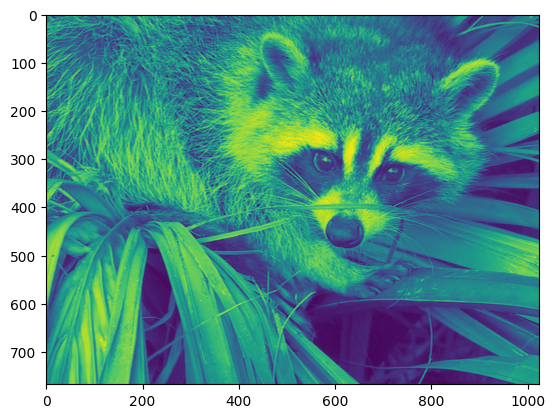

In [5]:
import matplotlib.pyplot as plt
face = sp.datasets.face(gray=True)
plt.imshow(face)

The face is displayed in false colors. A colormap must be specified for it
to be displayed in grey.

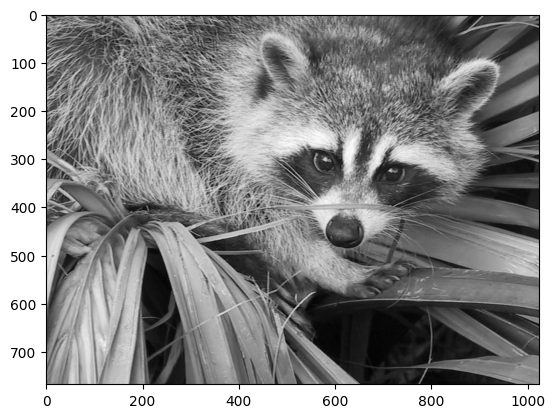

In [6]:
plt.imshow(face, cmap=plt.cm.gray)

### Narrow centering

Create an array of the image with a narrower centering; remove 100 pixels from
all the borders of the image. To check the result, display this new array with
`imshow`.

In [7]:
crop_face = face[100:-100, 100:-100]

### Frame face

We will now frame the face with a black locket. For this, we need to create
a mask corresponding to the pixels we want to be black. The center of the face
is around (660, 330), so we defined the mask by this condition `(y-300)\*\*2

- (x-660)\*\*2`

In [8]:
sy, sx = face.shape
y, x = np.ogrid[0:sy, 0:sx] # x and y indices of pixels
y.shape, x.shape

((768, 1), (1, 1024))

In [9]:
centerx, centery = (660, 300) # center of the image
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2 # circle

then we assign the value 0 to the pixels of the image corresponding to the
mask. The syntax is extremely simple and intuitive:

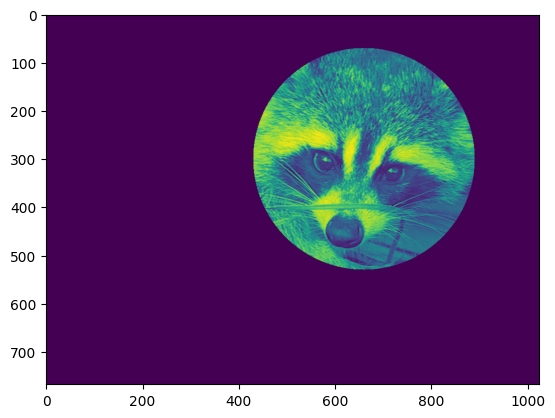

In [10]:
face[mask] = 0
plt.imshow(face)

Follow-up:

- copy all instructions of this exercise in a script called : `face_locket.py`
  then execute this script in IPython with `%run face_locket.py`.
- Change the circle to an ellipsoid.

## Data statistics

The data in {download}`populations.txt <../../data/populations.txt>`
describes the populations of hares and lynxes (and carrots) in
northern Canada during 20 years:

In [11]:
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T  # trick: columns to variables

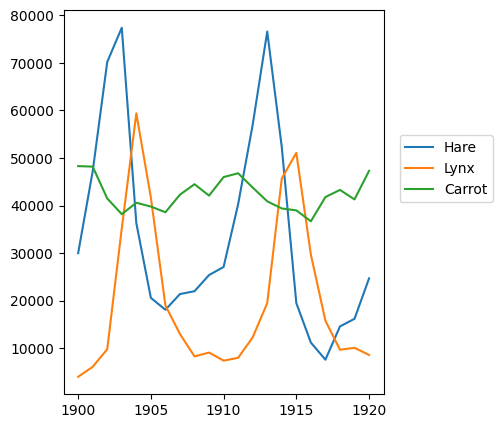

In [12]:
import matplotlib.pyplot as plt

plt.axes([0.2, 0.1, 0.5, 0.8])
plt.plot(year, hares, year, lynxes, year, carrots)
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))

::: {exercise-start}
:label: statistics-with-arrays
:class: dropdown
:::

Compute and print, based on the data in `populations.txt`...

1. The mean and std of the populations of each species for the years
   in the period.
2. Which year each species had the largest population.
3. Which species has the largest population for each year.
   (Hint: `argsort` & fancy indexing of
   `np.array(['H', 'L', 'C'])`)
4. Which years any of the populations is above 50000.
   (Hint: comparisons and `np.any`)
5. The top 2 years for each species when they had the lowest
   populations. (Hint: `argsort`, fancy indexing)
6. Compare (plot) the change in hare population (see
   `help(np.gradient)`) and the number of lynxes. Check correlation
   (see `help(np.corrcoef)`).

... all without for-loops.

::: {exercise-end}
:::

::: {solution-start} statistics-with-arrays
:class: dropdown
:::

       Hares, Lynxes, Carrots
Mean: [34080.95238095 20166.66666667 42400.        ]
Std: [20897.90645809 16254.59153691  3322.50622558]
Max. year: [1903. 1904. 1900.]
Max species:
[1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911.
 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920.]
['Carrot' 'Carrot' 'Hare' 'Hare' 'Lynx' 'Lynx' 'Carrot' 'Carrot' 'Carrot'
 'Carrot' 'Carrot' 'Carrot' 'Hare' 'Hare' 'Hare' 'Lynx' 'Carrot' 'Carrot'
 'Carrot' 'Carrot' 'Carrot']
Any above 50000: [1902. 1903. 1904. 1912. 1913. 1914. 1915.]
Top 2 years with lowest populations for each:
[[1917. 1900. 1916.]
 [1916. 1901. 1903.]]
diff(Hares) vs. Lynxes correlation -0.9179248480315341


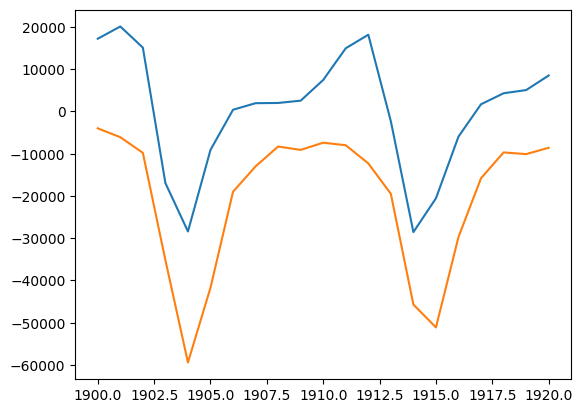

In [13]:
import numpy as np

data = np.loadtxt("data/populations.txt")
year, hares, lynxes, carrots = data.T
populations = data[:, 1:]

print("       Hares, Lynxes, Carrots")
print("Mean:", populations.mean(axis=0))
print("Std:", populations.std(axis=0))

j_max_years = np.argmax(populations, axis=0)
print("Max. year:", year[j_max_years])

max_species = np.argmax(populations, axis=1)
species = np.array(["Hare", "Lynx", "Carrot"])
print("Max species:")
print(year)
print(species[max_species])

above_50000 = np.any(populations > 50000, axis=1)
print("Any above 50000:", year[above_50000])

j_top_2 = np.argsort(populations, axis=0)[:2]
print("Top 2 years with lowest populations for each:")
print(year[j_top_2])

hare_grad = np.gradient(hares, 1.0)
print("diff(Hares) vs. Lynxes correlation", np.corrcoef(hare_grad, lynxes)[0, 1])

import matplotlib.pyplot as plt

plt.plot(year, hare_grad, year, -lynxes)
plt.savefig("plot.png")

::: {solution-end}
:::

## Crude integral approximations

::: {exercise-start}
:label: integral-approx
:class: dropdown
:::

Write a function `f(a, b, c)` that returns $a^b - c$. Form
a 24x12x6 array containing its values in parameter ranges `[0,1] x
[0,1] x [0,1]`.

Approximate the 3-d integral

$$
\int_0^1\int_0^1\int_0^1(a^b-c)da\,db\,dc
$$

over this volume with the mean. The exact result is: $\ln 2 -
\frac{1}{2}\approx0.1931\ldots$ --- what is your relative error?

(Hints: use elementwise operations and broadcasting.
You can make `np.ogrid` give a number of points in given range
with `np.ogrid[0:1:20j]`.)

**Reminder** Python functions:

In [14]:
def f(a, b, c):
    return some_result

::: {exercise-end}
:::

::: {solution-start} integral-approx
:class: dropdown
:::

In [15]:
import numpy as np
from numpy import newaxis


def f(a, b, c):
    return a**b - c


a = np.linspace(0, 1, 24)
b = np.linspace(0, 1, 12)
c = np.linspace(0, 1, 6)

samples = f(a[:, newaxis, newaxis], b[newaxis, :, newaxis], c[newaxis, newaxis, :])

# or,
#
# a, b, c = np.ogrid[0:1:24j, 0:1:12j, 0:1:6j]
# samples = f(a, b, c)

integral = samples.mean()

print("Approximation:", integral)
print("Exact:", np.log(2) - 0.5)

Approximation: 0.1888423460296792
Exact: 0.1931471805599453


::: {solution-end}
:::

## Mandelbrot set

::: {exercise-start}
:label: mandelbrot-fractal
:class: dropdown
:::

Write a script that computes the Mandelbrot fractal. The Mandelbrot
iteration:

In [16]:
N_max = 50
some_threshold = 50

c = x + 1j*y

z = 0
for j in range(N_max):
    z = z**2 + c

/var/folders/vr/b3dbt6vd3pd73sjc_t9xj87r0000gn/T/ipykernel_66801/585550489.py:8: RuntimeWarning: overflow encountered in square
  z = z**2 + c
/var/folders/vr/b3dbt6vd3pd73sjc_t9xj87r0000gn/T/ipykernel_66801/585550489.py:8: RuntimeWarning: invalid value encountered in square
  z = z**2 + c


Point (x, y) belongs to the Mandelbrot set if $|z|$ \<
`some_threshold`.

Do this computation by:

In [17]:
mask = np.ones((3, 3))

1. Construct a grid of c = x + 1j\*y values in range [-2, 1] x [-1.5, 1.5]
2. Do the iteration
3. Form the 2-d boolean mask indicating which points are in the set
4. Save the result to an image with:

   ```python
   import matplotlib.pyplot as plt
   plt.imshow(mask.T, extent=[-2, 1, -1.5, 1.5])
   plt.gray()
   plt.savefig('mandelbrot.png')
   ```

::: {exercise-end}
:::

::: {solution-start} mandelbrot-fractal
:class: dropdown
:::

/var/folders/vr/b3dbt6vd3pd73sjc_t9xj87r0000gn/T/ipykernel_66801/2370088976.py:17: RuntimeWarning: overflow encountered in square
  z = z**2 + c
/var/folders/vr/b3dbt6vd3pd73sjc_t9xj87r0000gn/T/ipykernel_66801/2370088976.py:17: RuntimeWarning: invalid value encountered in square
  z = z**2 + c


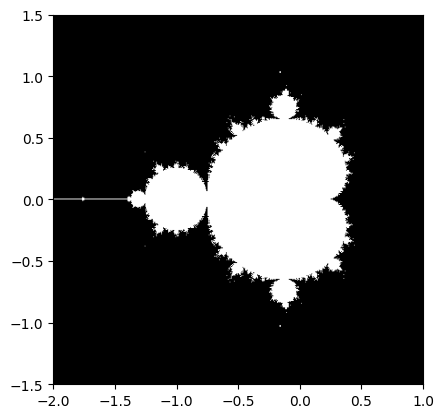

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis


def compute_mandelbrot(N_max, some_threshold, nx, ny):
    # A grid of c-values
    x = np.linspace(-2, 1, nx)
    y = np.linspace(-1.5, 1.5, ny)

    c = x[:, newaxis] + 1j * y[newaxis, :]

    # Mandelbrot iteration

    z = c
    for j in range(N_max):
        z = z**2 + c

    mandelbrot_set = abs(z) < some_threshold

    return mandelbrot_set

# Save

mandelbrot_set = compute_mandelbrot(50, 50.0, 601, 401)

plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])  # type: ignore[arg-type]
plt.gray()
plt.savefig("mandelbrot.png")

::: {solution-end}
:::

## Markov chain

![](images/markov-chain.png)

::: {exercise-start}
:label: markov-implementation
:class: dropdown
:::

Markov chain transition matrix `P`, and probability distribution on
the states `p`:

1. `0 <= P[i,j] <= 1`: probability to go from state `i` to state `j`
2. Transition rule: $p_{new} = P^T p_{old}$
3. `all(sum(P, axis=1) == 1)`, `p.sum() == 1`: normalization

Write a script that works with 5 states, and:

- Constructs a random matrix, and normalizes each row so that it
  is a transition matrix.
- Starts from a random (normalized) probability distribution
  `p` and takes 50 steps => `p_50`
- Computes the stationary distribution: the eigenvector of `P.T`
  with eigenvalue 1 (numerically: closest to 1) => `p_stationary`

  Remember to normalize the eigenvector — I didn't...

- Checks if `p_50` and `p_stationary` are equal to tolerance 1e-5

Toolbox: `np.random`, `@`, `np.linalg.eig`, reductions, `abs()`, `argmin`,
comparisons, `all`, `np.linalg.norm`, etc.

::: {exercise-end}
:::

::: {solution-start} markov-implementation
:class: dropdown
:::

Solution to Markov chain exercise.

In [19]:
import numpy as np

rng = np.random.default_rng(27446968)

n_states = 5
n_steps = 50
tolerance = 1e-5

# Random transition matrix and state vector
P = rng.random(size=(n_states, n_states))
p = rng.random(n_states)

# Normalize rows in P
P /= P.sum(axis=1)[:, np.newaxis]

# Normalize p
p /= p.sum()

# Take steps
for k in range(n_steps):
    p = P.T @ p

p_50 = p
print(p_50)

# Compute stationary state
w, v = np.linalg.eig(P.T)

j_stationary = np.argmin(abs(w - 1.0))
p_stationary = v[:, j_stationary].real
p_stationary /= p_stationary.sum()
print(p_stationary)

# Compare
if all(abs(p_50 - p_stationary) < tolerance):
    print("Tolerance satisfied in infty-norm")

if np.linalg.norm(p_50 - p_stationary) < tolerance:
    print("Tolerance satisfied in 2-norm")

[0.15219309 0.25577972 0.22811916 0.14261754 0.22129049]
[0.15219309 0.25577972 0.22811916 0.14261754 0.22129049]
Tolerance satisfied in infty-norm
Tolerance satisfied in 2-norm


::: {solution-end}
:::